## Soru-1 

**Nominal**: Cinsiyet

**Ordinal**: Belirtiler

**İnterval**: Vücut Sıcaklığı

**Ratio**: Yaş

In [7]:
import pandas as pd
 

data1 = {'İsim':['Furkan', 'Sude', 'Kübra', 'Ali'],
        'Cinsiyet':['Erkek', 'Kadın', 'Kadın', 'Erkek'],
        'Yaş':[26,22,18,35],
        'Vücut sıcaklığı':[39,36,37,40],
       'Belirtiler':['Çok','Belirsiz','Az','Çok fazla']}
 

dataframe = pd.DataFrame(data1)
 
print(dataframe)

     İsim Cinsiyet  Yaş  Vücut sıcaklığı Belirtiler
0  Furkan    Erkek   26               39        Çok
1    Sude    Kadın   22               36   Belirsiz
2   Kübra    Kadın   18               37         Az
3     Ali    Erkek   35               40  Çok fazla


## Soru - 2

In [1]:
import pandas as pd

df1 = pd.read_csv('data.csv', sep = ',')

print(df1.columns) 


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [2]:
df = df1[['radius_mean', 'area_mean', 'compactness_mean']]
print(df)

     radius_mean  area_mean  compactness_mean
0          17.99     1001.0           0.27760
1          20.57     1326.0           0.07864
2          19.69     1203.0           0.15990
3          11.42      386.1           0.28390
4          20.29     1297.0           0.13280
..           ...        ...               ...
564        21.56     1479.0           0.11590
565        20.13     1261.0           0.10340
566        16.60      858.1           0.10230
567        20.60     1265.0           0.27700
568         7.76      181.0           0.04362

[569 rows x 3 columns]


In [3]:
df.describe()

,radius_mean,area_mean,compactness_mean
count,569.000000,569.000000,569.000000
mean,14.127292,654.889104,0.104341
std,3.524049,351.914129,0.052813
min,6.981000,143.500000,0.019380
25%,11.700000,420.300000,0.064920
50%,13.370000,551.100000,0.092630
75%,15.780000,782.700000,0.130400
max,28.110000,2501.000000,0.345400


### radius_mean için IQR ve Outliers değerlerinin hesaplanması

In [4]:
desc = df.radius_mean.describe()
print(desc)

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64


In [5]:
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Bu iki değer aralığının dışında kalan her şey outlierdır:", lower_bound, "," ,upper_bound)


Bu iki değer aralığının dışında kalan her şey outlierdır: 5.579999999999999 , 21.9


In [58]:
print("Outliers:",df[(df.radius_mean < lower_bound) | (df.radius_mean > upper_bound)].radius_mean)

Outliers: 82     25.22
108    22.27
122    24.25
164    23.27
180    27.22
202    23.29
212    28.11
236    23.21
339    23.51
352    25.73
369    22.01
461    27.42
503    23.09
521    24.63
Name: radius_mean, dtype: float64


In [51]:
df[(df.radius_mean < lower_bound) | (df.radius_mean > upper_bound)].radius_mean.count()

14

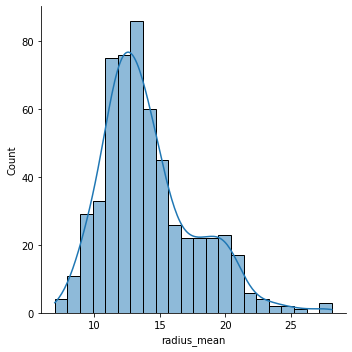

In [37]:
sns.displot(df.radius_mean, kde=True)

C:\Users\furka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='radius_mean'>

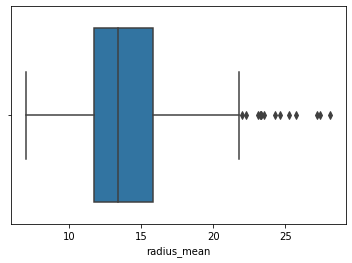

In [43]:
sns.boxplot(df.radius_mean)

### area_mean için IQR ve Outliers değerlerinin hesaplanması

In [60]:
desc = df.area_mean.describe()
print(desc)

count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area_mean, dtype: float64


In [61]:
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Bu iki değerin aralığının dışında kalan her şey outlierdır:", lower_bound, "," ,upper_bound)

Bu iki değerin aralığının dışında kalan her şey outlierdır: -123.30000000000001 , 1326.3000000000002


In [63]:
print("Outliers:",df[(df.area_mean < lower_bound) | (df.area_mean > upper_bound)].area_mean)

Outliers: 23     1404.0
82     1878.0
108    1509.0
122    1761.0
164    1686.0
180    2250.0
202    1685.0
212    2499.0
236    1670.0
250    1364.0
265    1419.0
272    1491.0
339    1747.0
352    2010.0
368    1546.0
369    1482.0
372    1386.0
373    1335.0
393    1407.0
449    1384.0
461    2501.0
503    1682.0
521    1841.0
563    1347.0
564    1479.0
Name: area_mean, dtype: float64


In [66]:
df[(df.area_mean < lower_bound) | (df.area_mean > upper_bound)].area_mean.count()

25

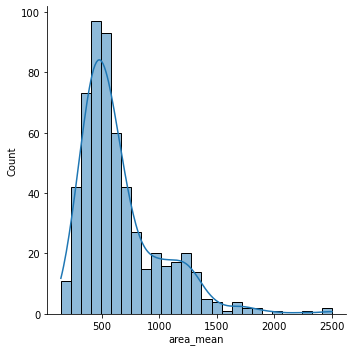

In [38]:
sns.displot(df.area_mean, kde=True)

C:\Users\furka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_mean'>

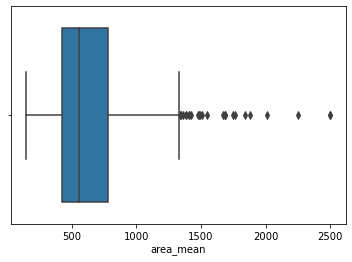

In [42]:
sns.boxplot(df.area_mean)

### compactness_mean için IQR ve Outliers değerlerinin hesaplanması

In [67]:
desc = df.compactness_mean.describe()
print(desc)

count    569.000000
mean       0.104341
std        0.052813
min        0.019380
25%        0.064920
50%        0.092630
75%        0.130400
max        0.345400
Name: compactness_mean, dtype: float64


In [68]:
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Bu iki değerin aralığının dışında kalan her şey outlierdır:", lower_bound, "," ,upper_bound)

Bu iki değerin aralığının dışında kalan her şey outlierdır: -0.03329999999999997 , 0.22861999999999996


In [69]:
print("Outliers:",df[(df.compactness_mean < lower_bound) | (df.compactness_mean > upper_bound)].compactness_mean)

Outliers: 0      0.2776
3      0.2839
9      0.2396
12     0.2458
14     0.2293
78     0.3454
82     0.2665
108    0.2768
122    0.2867
181    0.2832
190    0.2413
258    0.3114
351    0.2364
352    0.2363
400    0.2576
567    0.2770
Name: compactness_mean, dtype: float64


In [70]:
df[(df.compactness_mean < lower_bound) | (df.compactness_mean > upper_bound)].compactness_mean.count()

16

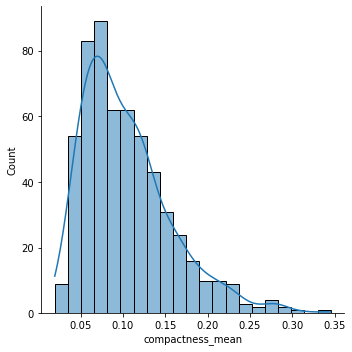

In [39]:
sns.displot(df.compactness_mean, kde=True)

C:\Users\furka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='compactness_mean'>

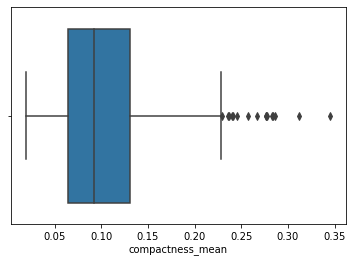

In [41]:
sns.boxplot(df.compactness_mean)

### Sonuç olarak "radius_mean, area_mean, compactness_mean" hücrelerine baktığımızda üçü de negatif tarafta toplanmış durumdadır. Outlierlar ise pozitif taraftadırlar. Bu duruma pozitif çarpık da denilmektedir.

## Soru - 3
### Pearson Correlation Map

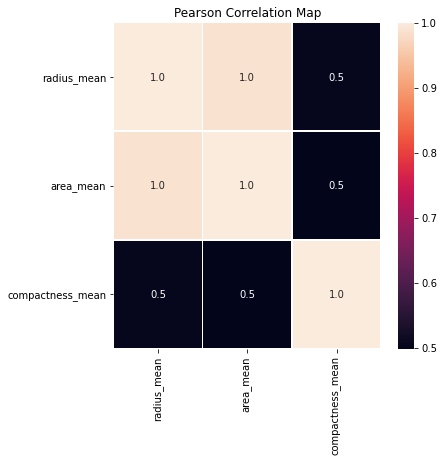

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize = (6,6))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt= ".1f", ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Pearson Correlation Map')
plt.show()

### Pearson Correlation katsayıları

In [23]:
p1 = df.loc[:,["area_mean","radius_mean"]].corr(method="pearson")
p2 = df.radius_mean.cov(df.area_mean)/(df.radius_mean.std()*df.area_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation:  0.987357170056613


In [24]:
p1 = df.loc[:,["compactness_mean","radius_mean"]].corr(method="pearson")
p2 = df.radius_mean.cov(df.compactness_mean)/(df.radius_mean.std()*df.compactness_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
                  compactness_mean  radius_mean
compactness_mean          1.000000     0.506124
radius_mean               0.506124     1.000000
Pearson correlation:  0.5061235775263633


In [25]:
p1 = df.loc[:,["compactness_mean","area_mean"]].corr(method="pearson")
p2 = df.area_mean.cov(df.compactness_mean)/(df.area_mean.std()*df.compactness_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
                  compactness_mean  area_mean
compactness_mean          1.000000   0.498502
area_mean                 0.498502   1.000000
Pearson correlation:  0.4985016821524121


### Spearman Rank Coefficient

In [26]:
ranked_df = df.rank()
spearman_corr = ranked_df.loc[:,["area_mean","radius_mean","compactness_mean"]].corr(method = "pearson")
print("Spearman's Correlation: ")
print(spearman_corr)

Spearman's Correlation: 
                  area_mean  radius_mean  compactness_mean
area_mean          1.000000     0.999602          0.488988
radius_mean        0.999602     1.000000          0.497578
compactness_mean   0.488988     0.497578          1.000000


### Effect Size

In [27]:
import numpy as np
df_bening = df1[df1["diagnosis"] == "B"]
df_malignant = df1[df1["diagnosis"] == "M"]
mean_diff = df_malignant.radius_mean.mean() - df_bening.radius_mean.mean() # m1 - m2
var_bening = df_bening.radius_mean.var()
var_malignant = df_malignant.radius_mean.var()
var_pooled = (len(df_bening)*var_malignant + len(df_malignant)*var_bening) / float(len(df_bening) + len(df_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect Size: ",effect_size)                                                                            

Effect Size:  1.9256579366893174


In [28]:
df_bening = df1[df1["diagnosis"] == "B"]
df_malignant = df1[df1["diagnosis"] == "M"]
mean_diff = df_malignant.area_mean.mean() - df_bening.area_mean.mean() # m1 - m2
var_bening = df_bening.area_mean.var()
var_malignant = df_malignant.area_mean.var()
var_pooled = (len(df_bening)*var_malignant + len(df_malignant)*var_bening) / float(len(df_bening) + len(df_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect Size: ",effect_size) 

Effect Size:  1.7030110773250295


In [29]:
df_bening = df1[df1["diagnosis"] == "B"]
df_malignant = df1[df1["diagnosis"] == "M"]
mean_diff = df_malignant.compactness_mean.mean() - df_bening.compactness_mean.mean() # m1 - m2
var_bening = df_bening.compactness_mean.var()
var_malignant = df_malignant.compactness_mean.var()
var_pooled = (len(df_bening)*var_malignant + len(df_malignant)*var_bening) / float(len(df_bening) + len(df_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect Size: ",effect_size) 

Effect Size:  1.3715524376097672


### Covariance

radius mean ve area mean covariance:  1224.4834093464567
radius mean ve compactness mean covariance  0.09419705682504517
area mean ve compactness mean covariance  9.264930788911855


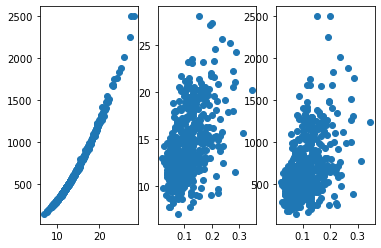

In [30]:
np.cov(df.radius_mean,df.area_mean)
print("radius mean ve area mean covariance: ",df.radius_mean.cov(df.area_mean))
print("radius mean ve compactness mean covariance ",df.radius_mean.cov(df.compactness_mean))
print("area mean ve compactness mean covariance ",df.area_mean.cov(df.compactness_mean))
fig, axs = plt.subplots(1, 3)
axs[0].scatter(df.radius_mean, df.area_mean)
axs[1].scatter(df.compactness_mean, df.radius_mean)
axs[2].scatter(df.compactness_mean, df.area_mean)
plt.show()

### Yorumlar
**Correlation**

Korelasyonlara baktığımızda area_mean ve radius_mean korelasyonun 1 e çok yakın bir değer olduğunu görüyoruz. Bu da bize  bu iki datanın tam pozitif korelasyon içinde olmasalarda birbirlerine çok benzer hareket ettiğini gösterir.

Compactness_mean için area_mean ve radius_mean ile benzer yönleri olsada aralarında güçlü bir bağ olduğundan söz edemeyiz.


**Covariance**

Kovaryanslara baktığımızda radius_mean ve area_mean kovaryansı pozitif olduğu için hareket yönlerinde güçlü bir ilişki olduğunu anlamaktayız. Zaten grafiğimiz de bize bunu göstermekte.

Compactness_mean için area_mean ve radius_mean ile aynı yönde hareket etmesine rağmen zayıf bir ilişki içinde olduğunu söyleyebiliriz.

## Soru - 4
### Bayes Teoremi Örnekler

**1-)** Kumaş üreten bir işletmede toplam üretimin %35’ini 𝑀1, %25’ni 𝑀2 ve %40’nı 𝑀3 makinesi üretmektedir. Bu makinelerin ürettiği bir top kumaşın kusurlu olma olasılıkları sırası ile%1, %3 ve %2’dir. Bir günlük üretimin sonunda bir top kumaş seçiliyor ve kusurlu olup olmadığına bakılıyor. Kumaş kusurlu ise, 𝑀1 makinesinde üretilmiş olma olasılığı nedir?

- 𝐴 : “Seçilen kumaşın kusurlu olması” 
- 𝐵1: “Kumaşın 𝑀1 makinesinde üretilmesi” 
- 𝐵2: “Kumaşın 𝑀2 makinesinde üretilmesi” 
- 𝐵3: “Kumaşın 𝑀3 makinesinde üretilmesi”

```
𝑃(𝐵1 |𝐴) = 𝑃(𝐵1 ∩ 𝐴) / 𝑃(𝐴) = 𝑃(𝐵1 )𝑃(𝐴|𝐵1 ) /[ 𝑃(𝐵1 )𝑃(𝐴|𝐵1 ) + 𝑃(𝐵2 )𝑃(𝐴|𝐵2 ) + 𝑃(𝐵3 )𝑃(𝐴|𝐵3)]

= (0,35.0,01)/[(0,35.0,01) + (0,25.0,03) + (0,4.0,02) = 0,18
```

**2-)**  Saman nezlesi varsa, kişinin romatoid artrit olasılığı olduğunu bulmak isteyebilirsiniz. Bu örnekte, "saman nezlesi geçirme", romatoid artritin (olay) testidir.
-	"Hastanın romatoid artriti var" olayı olurdu. Veriler, bir klinikteki hastaların yüzde 10'unun bu artrit tipine sahip olduğunu göstermektedir. 

P (A) = 0,10

-	B test "hasta saman nezlesi vardır." Veriler, bir klinikteki hastaların yüzde 5'inin saman nezlesi olduğunu göstermektedir. 

P (B) = 0,05

-	Klinik bulguları, romatoid artritli hastaların yüzde 7'sinde saman nezlesi olduğunu da göstermektedir. Diğer bir deyişle, romatizmal artriti olan bir hastanın saman nezlesi olasılığı yüzde 7'dir. B ∣ A = 0,07
Bu değerleri teorem içine takmak:

```
P (A-B) = (0.07 * 0.10) / (0.05) = 0.14
```

Yani, bir hastanın saman nezlesi varsa, romatoid artrit geçirme şansları yüzde 14'tür. Saman nezlesi romatoid artriti olan rastgele bir hasta olasılığı düşüktür.

**3-)** Bir danışmanlık şirketin üyeleri, 1. işletmeden %60 , 2. işletmeden %30 ve 3. işletmeden %10 oranında olmak üzere üç işletmeden araba kiralamaktadırlar. 1. işletmeden gelen araçların %9’u, 2. işetmeden gelen araçların %20’si ve 3. işletmeden gelen araçların %6’sı bakım gerektiriyorsa,

 a)	Şirkete kiralanan bir aracın bakım gerektirme olasılığı nedir?

 b)	Bakım gerektiren aracın 2. işletmeden gelmiş olma olasılığı nedir?

 B: Bir arabanın bakım gerektirmesi

 Ai: Arabanın 1, 2 ya da 3. işletmeden gelme i= 1, 2, 3 olayları olsun.


```
P( A1 ) = 0,60,     P( A2 ) = 0.30,          P(A3)=0.10
P(B | A1 ) = 0.09	P(B | A2 ) = 0.20         P(B | A3 ) = 0.06
```
 a) P(B) = arabanın	bakım	gerektirme	olasılığı	soruluyor.	Toplam olasılıktan yararlanılarak bulunur.
```
P(B) = (P(B | A1 ).P( A1 ) + P(B | A2 ).P( A2 ) + P(B | A3 ).P( A3 )
= (0.60).(0.09) + (0.30).(0.20) + (0.10).(0.06)
= 0.12
```
 Bu şirkette kiralanan araçların %12’sini bakım gerektirecektir.

    b) Danışmanlık şirketinin kiraladığı araba bakım gerektiriyorsa bu arabanın 2. işletmeden gelmiş olma olasılığı Bayes teoreminden yararlanılarak bulunabilir.

```
P( A| B) = [P(B | A2 ).P( A2 )] /   P(B | A ).P( A ) =  0.5
```

danışmanlık şirketinin kiraladığı arabalardan yalnızca%30’nun 2. işletmeden gelmesine karşın, bakım gerektiren arabaların yarısı (%50 si) 2. işletmeden gelmektedir.





**4-)** Bir hava üssünde tehlike olduğu zaman alarm sisteminin çalışması olasılığı 0.99, tehlike olmadığında alarm vermemesi olasılığı 0.98 ve herhangi bir anda tehlike olması olasılığı da 0.003’tür.
Hava üssündeki alarm çalıştığına göre, tehlike nedeniyle çalmış olması olasılığı nedir?

A: Alarm sisteminin çalışması

B: Tehlike olması olaylarını göstersin
```

P( A | B) = 0.99,   P(B) = 0.003 = P(B’) = 0.997olur.

P( A’ | B’) = 0.98 ise P( A | B’) = 0.02 olur.
```
Alarm sistemi çalışıyorsa tehlike nedeniyle olması olasılığı P(B|A)=? 
```

P(B | A) =[ P( A | B) : P(B) ] / P( A | B).P(B) = P( A | B’).P(B’)

= [(0.99).(0.003)] / [(0.99).(0.003)  (0.02).(0.997)] = 297/2291
```

Alarm sisteminin çalıştığı bilindiğine göre tehlike nedeniyle çalışması olasılığı, yaklaşık olarak, **%13**’tür.






**5-)** İki tabak dolusu bisküvi düşünülsün; 
Tabak -1 içinde 10 tane çikolatalı bisküvi ve 30 tane sade bisküvi bulunduğu kabul edilsin. 

Tabak -2 içinde ise her iki tip bisküviden 20’şer tane olduğu bilinsin.

Evin küçük çocuğu bir tabağı rastgele seçip bu tabaktan rastgele bir bisküvi seçip alsın.Çocuğun bir tabağı diğerine ve bir tip bisküviyi diğerine tercih etmekte olduğuna dair elimizde hiçbir gösterge bulunmamaktadır.Çocuğun seçtiği bisküvinin sade olduğu görülsün.

a-) Çocuğun bu sade bisküviyi Tabak -1’ den seçmiş olmasının olasılığı nedir?

Çocuğun bir sade bisküvi seçmiş olduğu bilinmektedir; 

O halde bu koşulla birlikte Tabak -1’den seçim yapması olasılığı ne olacaktır?

P(A) veya hiçbir diğer bilgi olmadan çocuğun tabak -1'den seçim yapması olasılığı

P(B) veya hiçbir diğer bilgi olmadan çocuğun bir sade bisküvi seçmesi olasılığı. 

Tabak -1'den bir sade bisküvi seçme olasılığı (30/40)= **0,75**

Tabak -2'den sade bisküvi seçme olasılığı     (20/40)= **0,5** olur.

Her iki tabaktan seçme olasılığı ise her tabak aynı şekilde uygulama gördüğü için **0,50** olur. 

Böylece bu problemin tümü için bir sade bisküvi seçme olasılığı (0.75×0.5) + (0.5×0.5) = **0.625** olarak bulunur.

P(B|A), veya çocuğun tabak -1'den seçim yaptığı bilirken bir sade bisküvi seçmesi: Bu 0,75 olarak bilinmektedir çünkü tabak -1'deki toplam 40 bisküviden 30'u sade bisküvidir.Şimdi bu açıklanan tüm olasılık değerleri Bayes Teoremi formülüne konulursa;Böylece çocuğun sade bisküvi seçimi bilindiğine göre tabak -1'den alma olasılığı **%60**'dır.







 
 
 





## Soru - 5
### Olasılık Dağılımları Karşılaştırmalı Tablo

|                                                                                                                                    Normal Dağılım                                                                                                                                    |                                                                                                      Poisson Dağılımı                                                                                                      |                                    Gamma Dağılımı                                   |                                                                                                                                               Weilbull Dağılımı                                                                                                                                              |                                                                             Logaritmik Dağılım                                                                            |
|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:-----------------------------------------------------------------------------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
| Normal Olasılık Dağılımı, bütün olasılık dağılımı modelleri  içinde en çok kullanılan modeldir.  Ölçüm hatalarının modellenmesindeki başarısından  dolayı fizikçiler tarafından bu isimle anılmaktadır. Gauss Olasılık Dağılımı ve Çan Biçimli Dağılım olarak da adlandırılmaktadır. | Belli bir zaman aralığında,  belli bir alanda nadir rastlanan  olayların olasılık dağılımlarını  poisson dağılımı ile modellenebilir.  Poisson dağılımı ortalaması ve  varyansı aynı olan  tek parametreli bir dağılımdır. | Güvenilirlik teorisinde  kullanılır. İki parametrelidir.  Şekil ve oran parametresi | Genellikle yaşam süreli veri analizinde kullanılır. Başarısızlık oranları ile ilgili veri seti için kurulacak modellerde yaygın olarak kullanılmaktadır. İki parametreli bir dağılımdır. Ölçek ve biçim parametresi. Bazı durumlarda konum parametresi de eklenerek üç parametreli olarak da çözümlenebilir. | Log-normal  Dağılımı adından da anlaşılacağı gibi normal dağılıma benzerdir. Logaritması Normal Dağılıma uyan  bir rasgele değişkenin Dağılımı   olarak tanımlayabiliriz  |
|                                                                                                                          Sürekli,simetrik, outlier sayısı az                                                                                                                         |                                                                                                           Kesikli                                                                                                          |         Sürekli, asimetrik, outlierlar genellikle pozitif tarafta toplanmış         |                                                                                                                      Sürekli, asimetrik, outlierlar genellikle pozitif tarafta toplanmış                                                                                                                     |                                                    Sürekli,asimetriki, outlierlar genellikle  pozitif tarafta toplanmış                                                   |
|                                                      Verilen bir normal dağılım probleminde olasılıkları hesaplamak, verilen bir sayısal datanın normal dağılımla  temsil edilip edilemeyeceğini belirlemek için kullanılabilir.                                                     |                                                 Bir turnikeden 1 dakikada geçen insan sayısı Bir kavşakta 1 saat içinde meydana  gelen trafik kazalarıgibi çoğaltılabilir.                                                 |                         Arıza zamanlarının tahmin edilmesi.                         |                                                                                       Rüzgar enerjisi potansiyelini belirlemede  en çok kullanılan dağılımdır. Ekstra olarak arıza zamanlarının tahmininde kullanılır.                                                                                       |                   Hisse senedi fiyatlarını, emlak fiyatlarını, ödeme ölçeklerini ve petrol rezervuar boyutunu belirlemek için yaygın olarak kullanılır.                   |